In [164]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import re
import math
from collections import Counter
%matplotlib inline

# Analyze feedbacks dataset

In [389]:
_df_train = pd.read_csv('../data/df_test.csv', encoding='utf-8')

In [390]:
_df_train.head()

,Unnamed: 0,sku,categoryLevel1Id,categoryLevel2Id,brandId,property,userName,reting,date,comment,commentNegative,commentPositive,vcomment
0,0,11024332,107,1070907,13,"[{236: 'e04af96afe53462f72f39331b209a810'}, {3...",ee6914bab207793e1eb805b2d755abc7,4.0,2010-01-28,????????? ?????????? 23.12.2010? ???????????? ...,NaN,NaN,[ 100 6 33 142 20 2 4233 1...
1,1,20003611,406,4060501,1050,"[{115: '6c9882bbac1c7093bd25041881277658'}, {1...",3d801da09e7d82668e226799d9db91dc,5.0,2009-10-19,???????? ????????????? ??? ????????? ??????? ?...,NaN,NaN,[ 351 74 4233 28 2 122 331 7...
2,2,20021789,401,4010201,1020,"[{10879: 'fc490ca45c00b1249bbe3554a4fdf6fb'}, ...",ae5953ee1b32ee7dd79a255f909e56ba,5.0,2015-09-25,????? ????????!!!?????!????????!???????!!!????...,NaN,NaN,[ 1647 610 85 31 335 983 917 ...
3,3,20022517,408,4080301,939,"[{3: '3ef815416f775098fe977004015c6193'}, {1: ...",07adc9f58dbb3c54b7b4b98d043451a5,3.0,2014-11-12,?????? ??????????? ????? Hansa FCCW51004017 ??...,NaN,NaN,[ 522 4 71 16 1 417 57 13...
4,4,20022078,413,4130401,31,"[{115: 'e5841df2166dd424a57127423d276bbe'}, {1...",b97e2eac92fb53290a17d63a92ac2afd,5.0,2012-03-19,"????????? ?????? ???, ?? ???? ?? ???????! ????...",NaN,NaN,[ 711 84 888 969 270 19125 21 ...


In [20]:
df = pd.read_csv('../data/X_train.csv')

In [21]:
df.shape

(15587, 11)

In [22]:
df.head()

,sku,categoryLevel1Id,categoryLevel2Id,brandId,property,userName,reting,date,comment,commentNegative,commentPositive
0,20005023,401,4010201,826,"[{34: 'f982777489055c6563d68c005fd24aad'}, {36...",b2898a81b45310b30beb8fc0c0a9ce1e,2.0,2013-06-28,"2,5 года работала и все...устала! Лампочка гор...",NaN,NaN
1,20020647,403,4030101,1425,"[{34: '9ce895413ebdf6b6dcb69b07dc782591'}, {36...",538c73d64461e13907bb95c51c38bfbc,2.0,2010-07-04,Через 2 месяца после истечении гарантийного ср...,NaN,NaN
2,20020701,401,4010401,124,"[{34: '9ce895413ebdf6b6dcb69b07dc782591'}, {36...",ddca2d0101513a6209db7868eed8be05,4.0,2010-05-27,пользуюсь уже три недели. нареканий ни каких н...,NaN,NaN
3,30012256,203,2030301,93,"[{34: '9ce895413ebdf6b6dcb69b07dc782591'}, {36...",289c20015b3713a82ba5ddf774d996f7,5.0,2016-10-11,Ребят этот системный блок подойдёт для игры кс...,NaN,NaN
4,30011341,205,2050201,656,"[{34: '9ce895413ebdf6b6dcb69b07dc782591'}, {36...",5576f82d149d4f688644fef2322c63ef,5.0,2010-02-26,"я считаю, что яри замечательный телефон! Прият...",NaN,NaN


In [24]:
print("Comment len. Max: {}, min: {}".format(df.comment.map(len).max(), df.comment.map(len).min()))

Comment len. Max: 3959, min: 1


# View the number of words in the comments

In [25]:
spl = lambda x: len(x.split())
print("Comment words count. Max: {}, min: {}".format(df.comment.map(spl).max(), df.comment.map(spl).min()))

Comment words count. Max: 617, min: 1


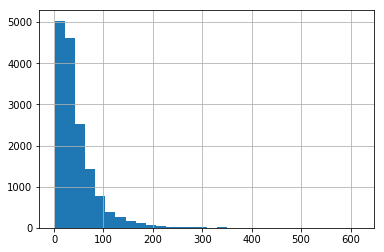

In [27]:
df.comment.map(spl).hist(bins=30)

In [28]:
df.comment.map(spl).describe()

count    15587.000000
mean        44.824148
std         44.691529
min          1.000000
25%         17.000000
50%         33.000000
75%         57.000000
max        617.000000
Name: comment, dtype: float64

In [58]:
words_counter = Counter()
add_words = lambda x: words_counter.update(re.findall(re_words, x))
df.comment.map(add_words)
print(len(words_counter))

63636


In [65]:
words_counter.most_common(10)

[('и', 21017),
 ('не', 19125),
 ('в', 14747),
 ('на', 11770),
 ('что', 7632),
 ('с', 6827),
 ('очень', 5619),
 ('но', 5097),
 ('для', 4233),
 ('как', 3853)]

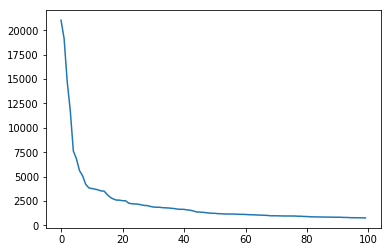

In [75]:
plt.plot([_[1] for _ in words_counter.most_common()[:100]])

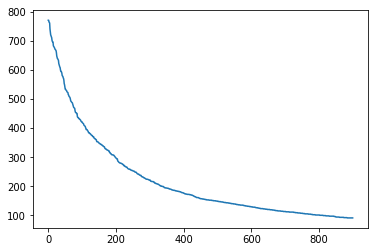

In [76]:
plt.plot([_[1] for _ in words_counter.most_common()[100:1000]])

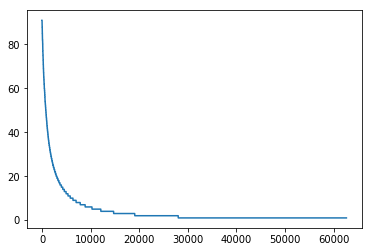

In [79]:
plt.plot([_[1] for _ in words_counter.most_common()[1000:100000]])

# View rating stat

In [31]:
df.reting.describe()

count    15587.000000
mean         4.118496
std          1.316966
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reting, dtype: float64

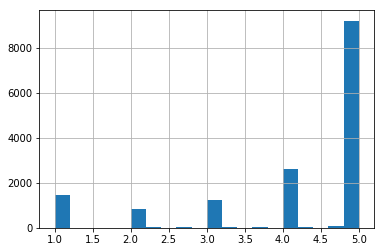

In [185]:
df.reting.hist(bins=20)

In [227]:
df.reting.value_counts()

5.0    9211
4.0    2609
1.0    1468
3.0    1245
2.0     854
4.7      78
4.3      54
3.7      16
3.3      16
2.7      15
2.3      14
1.3       6
1.7       1
Name: reting, dtype: int64

In [229]:
# imbalance in the rating 5
# remove random 5000
idx_for_remove = shuffle(df[df.reting == 5].index)[:5000]

In [231]:
df.drop(idx_for_remove, inplace=True)

In [232]:
df.shape

(10587, 12)

In [235]:
idx_for_test = shuffle(df.index)[:int(df.shape[0]*(1/5))]

In [237]:
df.reting.describe()

count    10587.000000
mean         3.702182
std          1.418888
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: reting, dtype: float64

In [239]:
df.loc[idx_for_test].reting.describe()

count    2117.000000
mean        3.712187
std         1.408435
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: reting, dtype: float64

In [241]:
df.loc[~df.index.isin(idx_for_test)].reting.describe()

count    8470.000000
mean        3.699681
std         1.421560
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: reting, dtype: float64

In [243]:
df_train = df.loc[~df.index.isin(idx_for_test)]

In [244]:
df_train.reset_index(inplace=True, drop=True)

In [245]:
df_train.to_csv('../data/df_train.csv', )

In [246]:
df_test = df.loc[idx_for_test]

In [247]:
df_test.reset_index(inplace=True, drop=True)

In [391]:
df_test.to_csv('../data/df_test.csv', encoding='utf-8')

# Vectorize comments on the frequency of words

In [302]:
def vectorize_comment(comment):
    return np.array([words_counter.get(word) for word in re.findall(re_words, comment)])

In [303]:
%%time
df['vcomment'] = df.comment.apply(vectorize_comment)

CPU times: user 340 ms, sys: 0 ns, total: 340 ms
Wall time: 340 ms


In [304]:
print("Comment vectors lenth. Max: {}, min: {}".format(df.vcomment.map(len).max(), df.vcomment.map(len).min()))

Comment vectors lenth. Max: 610, min: 0


In [374]:
VECTOR_LEN = 20*4#df.vcomment.map(len).max()

In [375]:
VECTOR_LEN

80

In [331]:
y = np.zeros((df.shape[0], 5))

In [334]:
y[2, 1] = 1

In [335]:
y

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [376]:
def get_train_data(df):
    X = np.zeros((df.shape[0], VECTOR_LEN))
    y = np.zeros((df.shape[0], 5))
    _y = np.rint(df.reting.values).astype(int)
    print("VECTOR_LEN", VECTOR_LEN)
    try:
        for i, row in df.iterrows():
            y[i, _y[i]-1] = 1

            lenth = len(row['vcomment'])
            vcomment = row['vcomment'][:]
            if lenth > VECTOR_LEN:
                lenth = VECTOR_LEN
                vcomment = vcomment[:lenth]
            X[i, :lenth] = np.array(vcomment)
    except Exception as e:
        print(e)
        print(i, _y[i], y[i])
    print("X.shape", X.shape)
    
    return X, y

In [195]:
np.unique(data_y)

array([ 1.,  2.,  3.,  4.,  5.])

In [118]:
# simple tensorflow rnn:

In [226]:
LSTM_SIZE = 256
FORGET_BIAS = 1.
N_OUTPUTS_1 = 256
N_OUTPUTS_2 = 256
N_OUTPUTS_3 = np.unique(data_y)
BATCH_SIZE = 64

num_batches, batch_size, num_features = 10, BATCH_SIZE, VECTOR_LEN
lstm_size = LSTM_SIZE

words_in_dataset = tf.placeholder(tf.float32, [1, batch_size, num_features])
lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
# Initial state of the LSTM memory.
hidden_state = tf.zeros([batch_size, lstm.state_size])
current_state = tf.zeros([batch_size, lstm.state_size])
state = hidden_state, current_state
probabilities = []
loss = 0.0

# The value of state is updated after processing each batch of words.
output, state = lstm(X_train[:64], state)
output = output[-1]

before_shape = int(np.prod(output.get_shape()[1:]))
after_shape = 5

W = tf.get_variable("W_1", shape=[before_shape, after_shape])
b = tf.get_variable("b_1", shape=[after_shape,])

# The LSTM output can be used to make next word predictions
logits = tf.matmul(output, W) + b
probabilities.append(tf.nn.softmax(logits))
loss += loss_function(probabilities, y_train[:64])

ValueError: setting an array element with a sequence.

In [220]:
LSTM_SIZE = 256
FORGET_BIAS = 1.
N_OUTPUTS_1 = 256
N_OUTPUTS_2 = 256
N_OUTPUTS_3 = np.unique(data_y)
BATCH_SIZE = 64

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, BATCH_SIZE, VECTOR_LEN])
y = tf.placeholder(tf.int32, [None])
is_training = tf.placeholder(tf.bool)

def get_rnn_v1(X, y, is_training):
        
    with tf.name_scope('rnn_1') as scope:
        # learn faster
        lstm_cell = tf.contrib.rnn.LSTMBlockCell(num_units=LSTM_SIZE, forget_bias=FORGET_BIAS)
        
        # Initial state of the LSTM memory.
#         hidden_state = tf.zeros([BATCH_SIZE, lstm_cell.state_size])
#         current_state = tf.zeros([BATCH_SIZE, lstm_cell.state_size])
#         state = hidden_state, current_state
#         probabilities = []
        
        # will be bounded by a non-zero vector len [123, 133, 33, 0, 0, 0 ...]
        out, state = tf.nn.dynamic_rnn(lstm_cell, X, dtype=tf.float32)
        out = out[-1]

    print('first_shape: {}'.format(out.get_shape()))
    
    with tf.name_scope('fc_1') as scope:
        before_shape = int(np.prod(out.get_shape()[1:]))
        after_shape = 5
        W = tf.get_variable("W_1", shape=[before_shape, after_shape])
        b = tf.get_variable("b_1", shape=[after_shape,])
        out = tf.matmul(out, W) + b
    
    print(out.get_shape())
    return out
    
y_out = get_rnn_v1(X, y, is_training)

print('shapes: {}, {}'.format(y_out.get_shape(), y.get_shape()))
total_loss = tf.losses.softmax_cross_entropy(tf.one_hot(y, 5), logits=y_out) 
mean_loss = tf.reduce_mean(total_loss)
optimizer = tf.train.AdamOptimizer(5e-4) # select optimizer and set learning rate
train_step = optimizer.minimize(mean_loss)

first_shape: (64, 256)
(64, 5)
shapes: (64, 5), (?,)


In [213]:
def split_train_and_test(data_X, data_y, train_part=1/5):
    train_count = int(data_X.shape[0] * train_part)
    data_X, data_y = shuffle(data_X, data_y, random_state=17)
    X_test, X_train = data_X[train_count:], data_X[:train_count]
    y_test, y_train  = data_y[train_count:], data_y[:train_count]
    print("X_train.shape = {}, X_test.shape = {}".format(X_train.shape, X_test.shape))
    print("y_train.shape = {}, y_test.shape = {}".format(y_train.shape, y_test.shape))
    return X_test, X_train, y_test, y_train

In [214]:
X_test, X_train, y_test, y_train = split_train_and_test(data_X, data_y)

X_train.shape = (3117, 621), X_test.shape = (12470, 621)
y_train.shape = (3117,), y_test.shape = (12470,)


In [221]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [222]:
sess.run(train_step, feed_dict={X: X_train[:64] , y: y_train[:64]})

ValueError: Cannot feed value of shape (64, 621) for Tensor 'Placeholder:0', which has shape '(?, 64, 621)'

In [ ]:
ts_start = time.time()


In [161]:
def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    total_loss = None
    total_correct = None
    out_put = []
    try:
        # have tensorflow compute accuracy
#         correct_prediction = tf.equal(tf.argmax(predict, y)
#         accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

        # shuffle indicies
        train_indicies = np.arange(Xd.shape[0])
        np.random.shuffle(train_indicies)

        training_now = training is not None

        # setting up variables we want to compute (and optimizing)
        # if we have a training function, add that to things we compute
        variables = [mean_loss]
        if training_now:
            variables[-1] = training

        # counter 
        iter_cnt = 0
        for e in range(epochs):
            # keep track of losses and accuracy
            correct = 0
            losses = []
            # make sure we iterate over the dataset once
            for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
                # generate indicies for the batch
                start_idx = (i*batch_size)%Xd.shape[0]
                idx = train_indicies[start_idx:start_idx+batch_size]

                # create a feed dictionary for this batch
                feed_dict = {X: Xd[idx,:],
                             y: yd[idx],
                             is_training: training_now }
                # get batch size
                actual_batch_size = yd[idx].shape[0]

                # have tensorflow compute loss and correct predictions
                # and (if given) perform a training step
                loss, corr, _ = session.run(variables,feed_dict=feed_dict)

                # aggregate performance stats
                losses.append(loss*actual_batch_size)
                correct += np.sum(corr)

                # print every now and then
                if training_now and (iter_cnt % print_every) == 0:
                    message = "Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                          .format(iter_cnt,loss,np.sum(corr)/actual_batch_size)
                    print(message)
                    out_put.append(message)
                iter_cnt += 1
            total_correct = correct/Xd.shape[0]
            total_loss = np.sum(losses)/Xd.shape[0]
            message = "Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
                  .format(total_loss,total_correct,e+1)
            print(message)
            out_put.append(message)
            if plot_losses:
                plt.plot(losses)
                plt.grid(True)
                plt.title('Epoch {} Loss'.format(e+1))
                plt.xlabel('minibatch number')
                plt.ylabel('minibatch loss')
                plt.show()
    except Exception as e:
        raise e
        out_put.append(str(e))
    return total_loss,total_correct, out_put

In [167]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [168]:
sess.run(train_step)

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,621,1]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,621,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-166-9b7bce55573b>", line 9, in <module>
    X = tf.placeholder(tf.float32, [None, VECTOR_LEN, 1])
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 1548, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 2094, in _placeholder
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,621,1]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,621,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [165]:
run_model(sess, y_out, mean_loss, X_train, y_train, 1, 256, 100, train_step, False)

ValueError: Cannot feed value of shape (256, 621) for Tensor 'Placeholder:0', which has shape '(?, 621, 1)'

## from youtube:

In [276]:
620/(2*2*5), 24**2 

(31.0, 576)

In [355]:
def iter_batch(X, y, batch_size):
    for i in range(int(X.shape[0]/batch_size)):
        start = i*batch_size
        end = i*batch_size + batch_size
        yield X[start:end], y[start:end]

In [299]:
import tensorflow as tf
from tensorflow.python.ops import rnn, rnn_cell

In [377]:
_X_train, _y_train = get_train_data(df_train)
_X_test, _y_test = get_train_data(df_test)

VECTOR_LEN 80
X.shape (8470, 80)
VECTOR_LEN 80
X.shape (2117, 80)


In [378]:
_X_train.shape

(8470, 80)

In [384]:
tf.reset_default_graph()

hm_epochs = 20
n_classes = 5
batch_size = 128
chunk_size = 20
n_chunks = 4
rnn_size = 64

x = tf.placeholder('float', [None, n_chunks, chunk_size])
y = tf.placeholder('float')


def recurrent_neural_network(x):
    layer = {'weights':tf.Variable(tf.random_normal([rnn_size, n_classes])),
             'biases':tf.Variable(tf.random_normal([n_classes]))}
    
    print(1, x.get_shape())
    
    x = tf.transpose(x, [1, 0, 2])
    print(2, x.get_shape())
    
    x = tf.reshape(x, [-1, chunk_size])
    print(3, x.get_shape())
    
    x = tf.split(x, n_chunks, 0)
    print(4, len(x), x[0].get_shape(),)
    lstm_cell = rnn_cell.BasicLSTMCell(rnn_size)
    outputs, states = tf.nn.static_rnn(lstm_cell, x, dtype=tf.float32) 
    
    output = tf.matmul(outputs[-1], layer['weights']) + layer['biases']

    return output


def train_neural_network(x):
    prediction = recurrent_neural_network(x)
    cost = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y)
    )
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            for (epoch_x, epoch_y) in iter_batch(_X_train, _y_train, batch_size):
                epoch_x = epoch_x.reshape((batch_size, n_chunks, chunk_size))
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                epoch_loss += c

            print('Epoch', epoch, 'completed out of',hm_epochs,'loss:',epoch_loss)

        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))

        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print(
            'Accuracy:',
            accuracy.eval({x:_X_test.reshape((-1, n_chunks, chunk_size)), y:_y_test})
        )

In [363]:
train_neural_network(x)

1 (?, 24, 24)
2 (24, ?, 24)
3 (?, 24)
4 24 (?, 24)
Epoch 0 completed out of 3 loss: 99.4846767187
Epoch 1 completed out of 3 loss: 95.3996949196
Epoch 2 completed out of 3 loss: 94.8969253302
Accuracy: 0.405291


In [365]:
train_neural_network(x)

1 (?, 24, 24)
2 (24, ?, 24)
3 (?, 24)
4 24 (?, 24)
Epoch 0 completed out of 10 loss: 97.8797097206
Epoch 1 completed out of 10 loss: 95.3734817505
Epoch 2 completed out of 10 loss: 95.068767786
Epoch 3 completed out of 10 loss: 94.7169961929
Epoch 4 completed out of 10 loss: 94.3189940453
Epoch 5 completed out of 10 loss: 93.9752606153
Epoch 6 completed out of 10 loss: 93.6479409933
Epoch 7 completed out of 10 loss: 93.4034472704
Epoch 8 completed out of 10 loss: 93.0756297112
Epoch 9 completed out of 10 loss: 92.7269163132
Accuracy: 0.392537


In [367]:
train_neural_network(x)

1 (?, 24, 24)
2 (24, ?, 24)
3 (?, 24)
4 24 (?, 24)
Epoch 0 completed out of 20 loss: 99.360178709
Epoch 1 completed out of 20 loss: 95.656227231
Epoch 2 completed out of 20 loss: 95.2892481089
Epoch 3 completed out of 20 loss: 94.8675023317
Epoch 4 completed out of 20 loss: 94.624560833
Epoch 5 completed out of 20 loss: 94.2713340521
Epoch 6 completed out of 20 loss: 94.0349539518
Epoch 7 completed out of 20 loss: 93.7472913265
Epoch 8 completed out of 20 loss: 93.4175435305
Epoch 9 completed out of 20 loss: 93.1657699347
Epoch 10 completed out of 20 loss: 92.8813531399
Epoch 11 completed out of 20 loss: 92.7012565136
Epoch 12 completed out of 20 loss: 92.5030540228
Epoch 13 completed out of 20 loss: 92.0236978531
Epoch 14 completed out of 20 loss: 91.5962371826
Epoch 15 completed out of 20 loss: 91.3623549938
Epoch 16 completed out of 20 loss: 91.3623695374
Epoch 17 completed out of 20 loss: 90.9268134832
Epoch 18 completed out of 20 loss: 90.3944739103
Epoch 19 completed out of 20 lo

In [385]:
train_neural_network(x)

1 (?, 4, 20)
2 (4, ?, 20)
3 (?, 20)
4 4 (?, 20)
Epoch 0 completed out of 20 loss: 160.915260792
Epoch 1 completed out of 20 loss: 139.074428082
Epoch 2 completed out of 20 loss: 132.018848181
Epoch 3 completed out of 20 loss: 128.249521375
Epoch 4 completed out of 20 loss: 123.707511783
Epoch 5 completed out of 20 loss: 119.691427946
Epoch 6 completed out of 20 loss: 118.084456205
Epoch 7 completed out of 20 loss: 114.815919518
Epoch 8 completed out of 20 loss: 113.764876127
Epoch 9 completed out of 20 loss: 111.4965868
Epoch 10 completed out of 20 loss: 110.05403316
Epoch 11 completed out of 20 loss: 108.941696763
Epoch 12 completed out of 20 loss: 107.889149308
Epoch 13 completed out of 20 loss: 106.725875378
Epoch 14 completed out of 20 loss: 105.632687926
Epoch 15 completed out of 20 loss: 104.733488321
Epoch 16 completed out of 20 loss: 103.923822284
Epoch 17 completed out of 20 loss: 102.943990827
Epoch 18 completed out of 20 loss: 102.091419458
Epoch 19 completed out of 20 loss:

In [386]:
# try to spars matrix